Sentiment Analysis of IMDB Movie Reviews

Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a body of text. It helps in identifying and categorizing opinions expressed in a piece of content as positive, negative, or neutral. Sentiment analysis is widely used in various domains, including:

Customer feedback analysis: Understanding opinions in reviews, social media, or surveys.
Market research: Analyzing sentiment about products, brands, or competitors.
Public opinion: Assessing sentiment in political campaigns, news articles, or social media trends.

Applications:
Social media monitoring: Companies analyze tweets, comments, and posts to gauge public sentiment about their products or services.
Customer service: Automated systems detect customer dissatisfaction and prioritize responses.
Financial market predictions: Sentiment from news and social media is used to forecast market trends.
Sentiment analysis helps organizations better understand customer opinions and improve decision-making by identifying trends and insights hidden in textual data.


In this session, we will be processing the imdb movie reviews to develop a machine learning model to predict sentiment of reviews

Import Libraries

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


NLTK (Natural Language Toolkit) is a popular open-source library in Python for working with human language data (text). It provides tools for a wide variety of Natural Language Processing (NLP) tasks such as tokenization, parsing, stemming, tagging, and sentiment analysis.

In [2]:
import nltk

# Download stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROHSU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read dataset

In [3]:
data=pd.read_csv("IMDB Dataset.csv")

DataFrame Summary and Missing Values Analysis
This code defines two functions: missing_values_analysis(df) and check_df(df). It helps analyze a given DataFrame (df) by:

Checking the shape of the DataFrame (number of rows and columns).
Identifying the data types of each column.
Performing a missing values analysis, showing the total missing values and their percentage in each column that contains missing data.
Displaying the first few rows of the DataFrame for a quick preview.

In [4]:
#check the number of rows and columns
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_df(df, head=5):
    print("--------------------- Shape --------------------")
    print(df.shape)
    print("-------------------- Types ---------------------")
    print(df.dtypes)
    print("----------------- NaN Analysis -----------------")
    print(missing_values_analysis(df))
    print("--------------------- Head ---------------------")
    print(df.head())

check_df(data)

--------------------- Shape --------------------
(50000, 2)
-------------------- Types ---------------------
review       object
sentiment    object
dtype: object
----------------- NaN Analysis -----------------
Empty DataFrame
Columns: [Total Missing Values, Ratio]
Index: []
--------------------- Head ---------------------
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Sentiment Distribution Visualization
Pie Chart:

Visualizes the percentage breakdown of positive and negative sentiments.
The pie chart uses two colors and includes an exploded slice for better emphasis.

Count Plot:

Displays a bar chart showing the count of positive and negative sentiments.
Uses the same color palette as the pie chart for consistency.


c:\Users\ROHSU\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


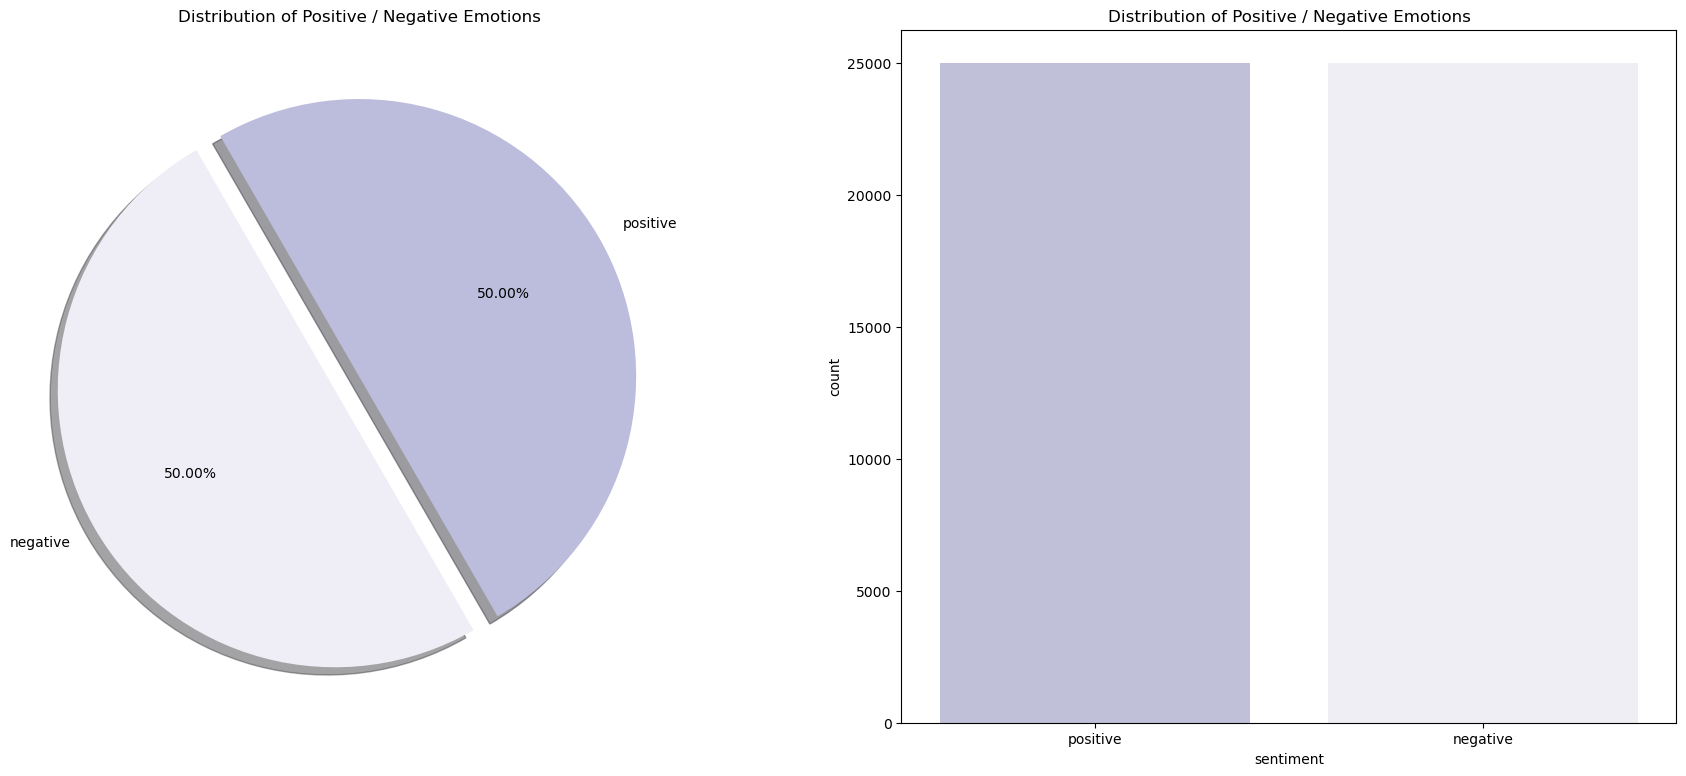

In [5]:
a , ax = plt.subplots(1,2,figsize=(22,9))
data['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=300, colors = ["#bcbddc", "#efedf5"])
ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')
sns.countplot('sentiment', data = data ,ax=ax[1], palette=["#bcbddc", "#efedf5"])
ax[1].set_title('Distribution of Positive / Negative Emotions')
plt.show()

Its a balanced dataset

Word cloud -Most common Negative words used

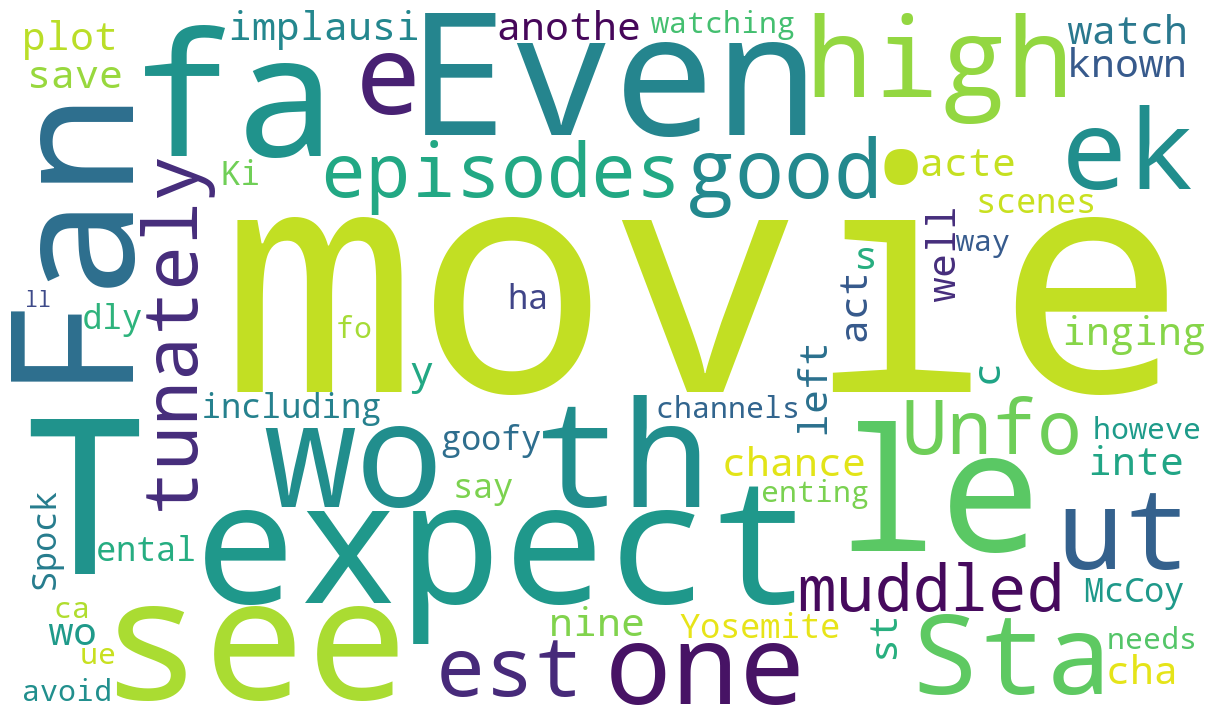

In [6]:
text_list=data.loc[data['sentiment']=='negative','review'].tolist()
text=""
for sent in text_list:
    sent=re.sub("[<br>]"," ",sent)
    text=re.sub("[^A-Za-z0-9]+"," ",sent)
    text+=sent

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


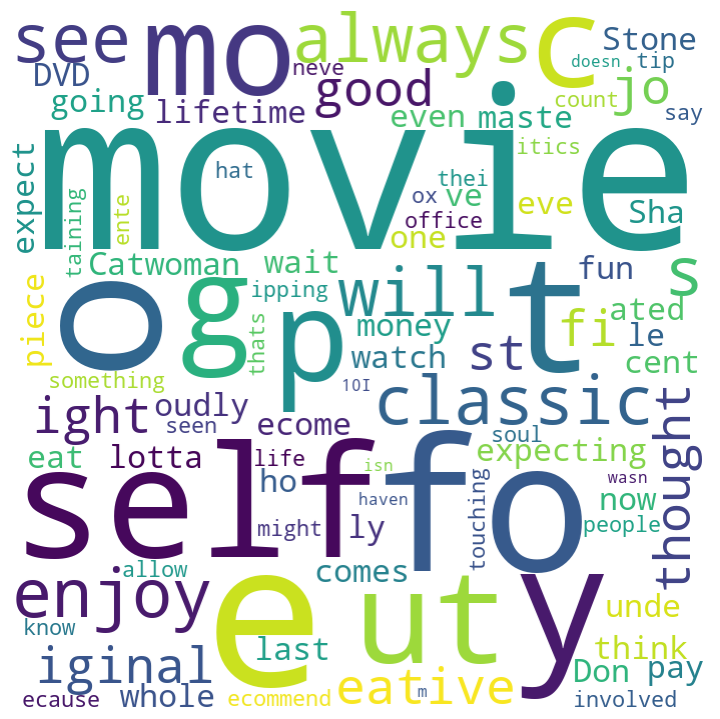

In [7]:
text_list=data.loc[data['sentiment']=='positive','review'].tolist()
text=""
for sent in text_list:
    sent=re.sub("[<br>]"," ",sent)
    text=re.sub("[^A-Za-z0-9]+"," ",sent)
    text+=sent

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=700,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [8]:
example_review = data.review[0]
example_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In Natural Language Processing (NLP), text cleaning is a crucial step to prepare data for analysis or model training. 
1. Remove HTML Tags
2. Lowercasing
3. Remove Punctuation
4. Remove Stop Words
5. Tokenization
6. Lemmatization/Stemming


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."

Text Tokenization and Stopwords Removal

This script performs tokenization and stopwords removal on text data within a DataFrame. The goal is to preprocess text data by breaking it into tokens and filtering out common stopwords.

Components:
1. Tokenization:
    - Utilizes the `ToktokTokenizer` from the `nltk.tokenize` module to split text into tokens.

2. Stopwords Removal:
    - Uses a predefined list of English stopwords from `nltk.corpus.stopwords`.
    - Removes stopwords from the text based on whether the text should be in lower case or not.

Functions:
- remove_stopwords(text, is_lower_case=False):
    - Tokenizes the input text.
    - Removes stopwords from the tokens.
    - Returns the filtered text as a string.

Parameters:
- `text`: The input text to be processed.
- `is_lower_case` (optional): Boolean flag to specify if the stopwords removal should consider lowercased tokens (default: False).

Usage:
1. Import necessary libraries and initialize the tokenizer and stopword list.
2. Define the `remove_stopwords` function to process the text data.
3. Create a DataFrame with a 'review' column containing text data.
4. Apply the `remove_stopwords` function to the 'review' column to preprocess the text.

Example:
    # Example DataFrame
    data = pd.DataFrame({
        'review': [
            "This is a sample review with some common words.",
            "Another review with more text and stopwords.",
            "A clean review after removing stopwords."
        ]
    })

    # Apply the remove_stopwords function to the review column
    data['review'] = data['review'].apply(remove_stopwords)

    print(data)

In [9]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)


Text Cleaning for Reviews

This script  specifically targets HTML tags and text enclosed within square brackets for removal.

Functions:
- strip_html(text): Removes HTML tags from the input text using BeautifulSoup.
- remove_between_square_brackets(text): Removes any text enclosed in square brackets, including the brackets themselves.
- de_noise_text(text): Applies the above cleaning functions to remove HTML tags and text within square brackets.

Usage:
1. Define the functions for text cleaning.
2. Create a DataFrame with a 'review' column containing text data.
3. Apply the `de_noise_text` function to the 'review' column to clean the text.

Example:
    # Example DataFrame
    data = pd.DataFrame({
        'review': [
            "This is a sample review <b>with HTML</b> and [some unnecessary text].",
            "Another review without HTML but [with brackets] around.",
            "Just a clean review without any noise."
        ]
    })
    
    # Apply the de_noise_text function to the review column
    data['review'] = data['review'].apply(de_noise_text)
    
    print(data)



In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def de_noise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(de_noise_text)

c:\Users\ROHSU\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Special Characters Removal from Text

This script defines a function to remove special characters from text data. The function is used to preprocess text by eliminating unwanted characters, leaving only alphanumeric characters and spaces.

Components:
1. Function Definition:
    - `remove_special_characters(text, remove_digits=True)`: A function to remove special characters from the input text.

Parameters:
- `text` (str): The input text from which special characters will be removed.
- `remove_digits` (bool, optional): A flag to indicate if digits should be removed (default: True). This parameter is currently not used in the function but can be incorporated for more control if needed.

Returns:
- str: The cleaned text with special characters removed.

Usage:
1. Define the `remove_special_characters` function to process the text data.
2. Create a DataFrame with a 'review' column containing text data.
3. Apply the `remove_special_characters` function to the 'review' column to preprocess the text by removing special characters.

Example:
    # Example DataFrame
    data = pd.DataFrame({
        'review': [
            "This is a sample review with special characters! @#$%",
            "Another review with some digits 1234 and symbols.",
            "Clean text after removing special characters."
        ]
    })

    # Apply the remove_special_characters function to the review column
    data['review'] = data['review'].apply(remove_special_characters)

    print(data)


In [11]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

Stemming Text Data

This script defines a function to apply stemming to text data. Stemming is a process in natural language processing (NLP) that reduces words to their root form. This function uses the Porter Stemmer from the NLTK library to perform stemming on each word in the text.

Components:
1. Function Definition:
    - `simple_stemmer(text)`: A function to stem words in the input text using the Porter Stemmer.

Parameters:
- `text` (str): The input text on which stemming will be applied.

Returns:
- str: The text with words reduced to their root forms.

Usage:
1. Define the `simple_stemmer` function to process the text data.
2. Create a DataFrame with a 'review' column containing text data.
3. Apply the `simple_stemmer` function to the 'review' column to preprocess the text by stemming.

Example:
    # Example DataFrame
    data = pd.DataFrame({
        'review': [
            "Running quickly through the fields.",
            "The stems of the plants are green.",
            "Stemming words helps in text analysis."
        ]
    })

    # Apply the simple_stemmer function to the review column
    data['review'] = data['review'].apply(simple_stemmer)

    print(data)

In [12]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

Extract and Preview Normalized Training and Testing Reviews

This script segment is responsible for splitting the normalized review data into training and testing datasets. The reviews are extracted based on their indices, where the first 40,000 reviews are designated for training and the remaining reviews are reserved for testing.

Components:
1. Training Reviews:
   - Extract the first 40,000 reviews from the normalized data for training purposes.
   - Preview a sample review from this subset.

2. Testing Reviews:
   - Extract reviews from index 40,000 onward for testing purposes.
   - Preview a sample review from this subset.

Parameters:
- `data.review` (pd.Series): A Pandas Series containing the normalized review texts.

Returns:
- `norm_train_reviews` (pd.Series): A Series containing the training reviews.
- `norm_test_reviews` (pd.Series): A Series containing the testing reviews.

Usage:
1. Extract the required reviews for model training and evaluation.
2. Use these subsets to train models and assess their performance on unseen test data.

Example:
    # Extract and preview normalized reviews for training and testing
    norm_train_reviews = data.review[:40000]
    print(norm_train_reviews[0])  # Preview a training review
    
    norm_test_reviews = data.review[40000:]
    print(norm_test_reviews[40001])  # Preview a testing review


In [13]:
# Label Binarization of Sentiment Data
# Initialize the LabelBinarizer to convert sentiment labels into binary format
lb = LabelBinarizer()

# Transform the 'sentiment' column into a binary matrix
# Each unique sentiment label will be converted into a binary vector
sentiment_data = lb.fit_transform(data['sentiment'])

# Print the shape of the resulting binary matrix
# This will show the number of samples (rows) and the number of binary features (columns)
print(sentiment_data.shape)


(50000, 1)


In [14]:
# Splitting Sentiment Data into Training and Testing Sets
# Separate the sentiment data into training and testing sets
# The training set consists of the first 40,000 samples
# The testing set consists of the remaining samples

# Extracting the first 40,000 samples for training
#normalized train reviews
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]
# Extracting the remaining samples for testing
#Normalized test reviews
norm_test_reviews=data.review[40000:]
norm_test_reviews[40001]


'excit see sitcom would hope repres indian candian found show funni all produc cast probabl happi get bad good feed back far concern get talk readi stereotyp problem stereotyp exist reason usual true realli anyth funni stereotyp charact fresh boat dad understand daughter radic feminist muslim daughter way terribl actress young modern indian man tri run mosqu polit correct pretti good actor see get better it contriv dialog flow well much potenti someth like sadli think fail realli care watch anoth episodei howev enjoy watch great canadian actress sheila mccarthi alway treat natur everyth bad daughter show act abil'

In [15]:
# Splitting Sentiment Data into Training and Testing Sets

# The training set consists of the first 40,000 samples
# The testing set consists of the remaining samples

# Extracting the first 40,000 samples for training
train_sentiment_y = sentiment_data[:40000]

# Extracting the remaining samples for testing
test_sentiment_y = sentiment_data[40000:]

# Print the training and testing sentiment data
# This will display the content of the training and testing sets to verify the split
print(train_sentiment_y)
print(test_sentiment_y)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [16]:
## Bag of Words (BoW) Model using Count Vectorizer
# This code snippet demonstrates how to use CountVectorizer to convert text data into a matrix of token counts.
# It handles tokenization into unigrams, bigrams, and trigrams, and processes both training and test datasets.

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with specified parameters
vectorizer = CountVectorizer(max_features=10000)

# Transform the training reviews into a matrix of token counts
train_x = vectorizer.fit_transform(norm_train_reviews)

# Transform the test reviews into a matrix of token counts using the same vocabulary
test_x = vectorizer.transform(norm_test_reviews)
# Output the shape of the transformed matrices
print('BOW_cv_train:', train_x.shape)
print('BOW_cv_test:', test_x.shape)

# Retrieve feature names (terms/ngrams) used for tokenization
# vocab = cv.get_feature_names() # Uncomment to get feature names

BOW_cv_train: (40000, 10000)
BOW_cv_test: (10000, 10000)


Model evaluation

In [17]:
models = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))

c:\Users\ROHSU\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ROHSU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 3.37 s
True Positives (TP): 4398
True Negatives (TN): 4390
False Positives (FP): 617
False Negatives (FN): 595


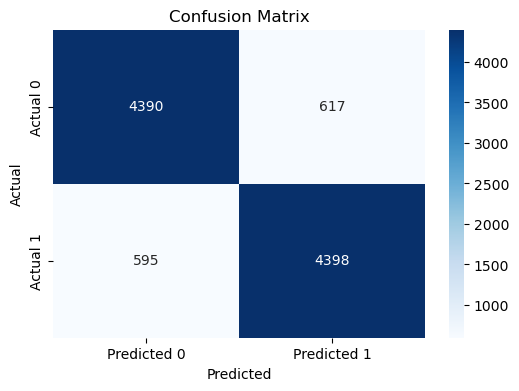

              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88      4993
     Class 1       0.88      0.88      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

-----------------------------------------------------------------------


<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 3min 32s
True Positives (TP): 4263
True Negatives (TN): 4228
False Positives (FP): 779
False Negatives (FN): 730


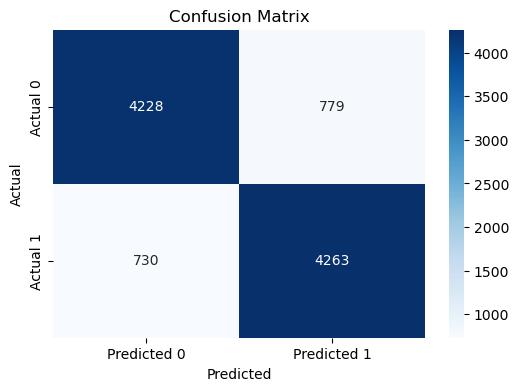

              precision    recall  f1-score   support

     Class 0       0.85      0.85      0.85      4993
     Class 1       0.85      0.84      0.85      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

-----------------------------------------------------------------------
Wall time: 1min 39s
True Positives (TP): 3595
True Negatives (TN): 3585
False Positives (FP): 1422
False Negatives (FN): 1398


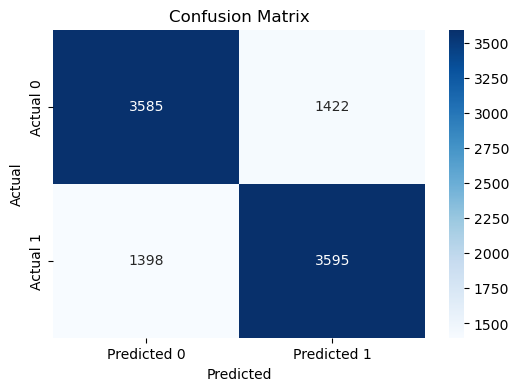

              precision    recall  f1-score   support

     Class 0       0.72      0.72      0.72      4993
     Class 1       0.72      0.72      0.72      5007

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

-----------------------------------------------------------------------


In [18]:
for name, model in models:

    %time model.fit(train_x, train_sentiment_y)
    test_pred = model.predict(test_x)
    #print(name ,'Accuracy Score : ',accuracy_score(test_sentiment_y, test_pred))
    #print(name ,'F1 Score : ',f1_score(test_sentiment_y, test_pred, average='weighted'))
    #confusion matrix for bag of words
    cm=confusion_matrix(test_sentiment_y,test_pred,labels=[1,0])
    # Extracting TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()  # .ravel() flattens the confusion matrix into a 1D array

    # Print values of TP, TN, FP, FN
    print(f'True Positives (TP): {tp}')
    print(f'True Negatives (TN): {tn}')
    print(f'False Positives (FP): {fp}')
    print(f'False Negatives (FN): {fn}')
    # Display confusion matrix using seaborn heatmap for better visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    report = classification_report(test_sentiment_y, test_pred, target_names=['Class 0', 'Class 1'])

    # Print the classification report
    print(report)
    print('-----------------------------------------------------------------------')
